<a href="https://colab.research.google.com/github/AIceDog/Pyotrch-Notes/blob/master/Notes%20about%20Liangqu%20Long%20Courses%20of%20Pytorch%20Deep%20Learning/BatchNorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [8]:
normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                 std = [0.229, 0.224, 0.225])

# CLASS   torchvision.transforms.Normalize(mean, std, inplace=False)
Normalize a tensor image with mean and standard deviation.

This transform does not support PIL Image.

Given mean: (mean[1],...,mean[n]) and std: (std[1],..,std[n]) for n channels,

this transform will normalize each channel of the input torch.*Tensor i.e., 

output[channel] = (input[channel] - mean[channel]) / std[channel]

In [10]:
normalize

Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# Image1

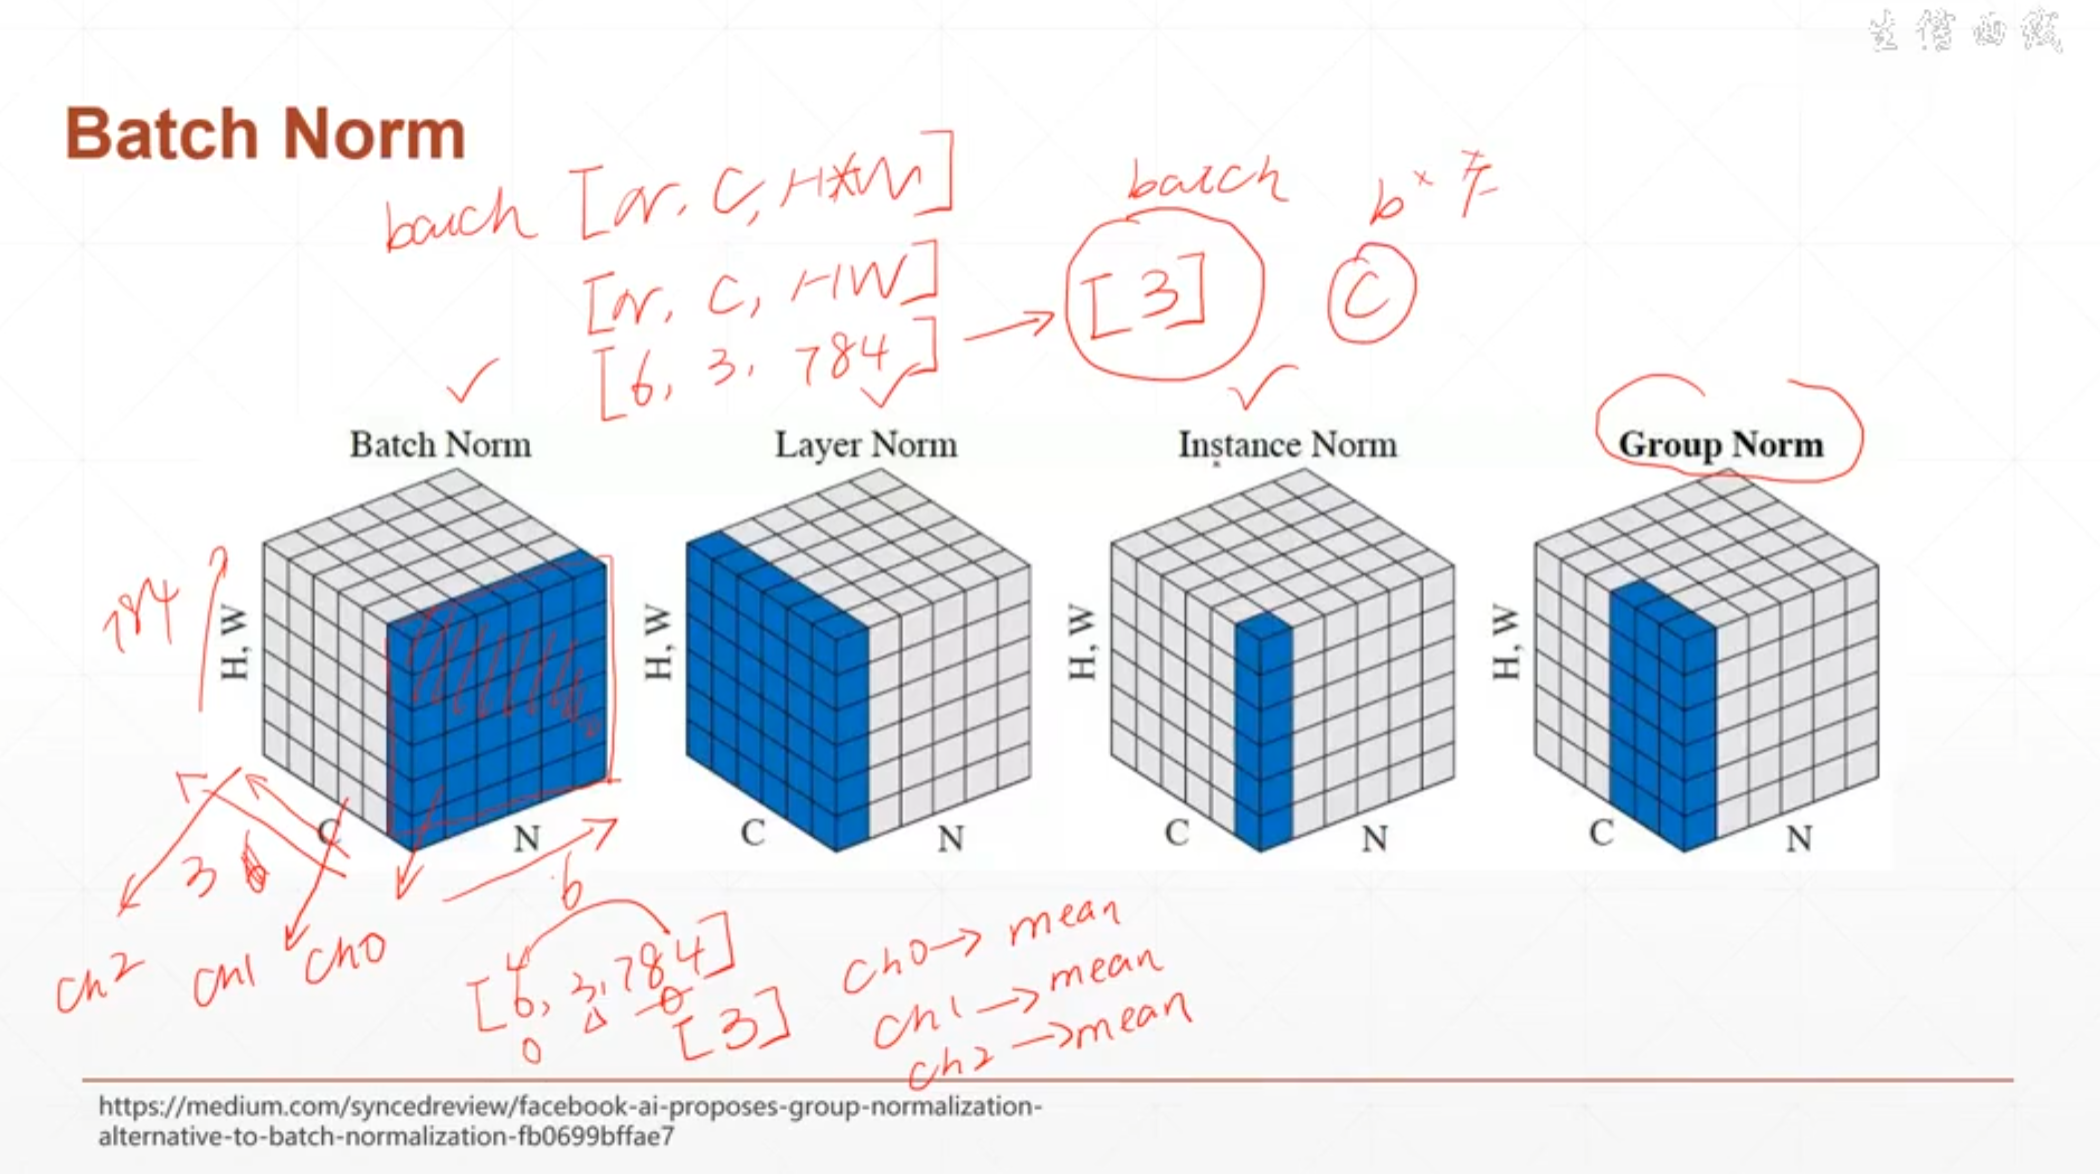

针对上图 Batch Norm, 假设图片的维度为 [5(image amount), 3(image channel amount), 25(width), 25(height)]

每个高为 H x W 并且底为 1 的长方体表示单张图片的一个 channel 的内容

对图片进行 Batch Norm, 计算所有图片 3 个 image channel 下的 mean, 得到一个数组 [mean0, mean1, mean2], 它们分别表示 channel0、channel1、channel2 下的 mean

*   mean0 = (sum of all pixel value in channel0) / (5 x 25 x 25)
*   mean1 = (sum of all pixel value in channel1) / (5 x 25 x 25)
*   mean2 = (sum of all pixel value in channel2) / (5 x 25 x 25)

# Image2

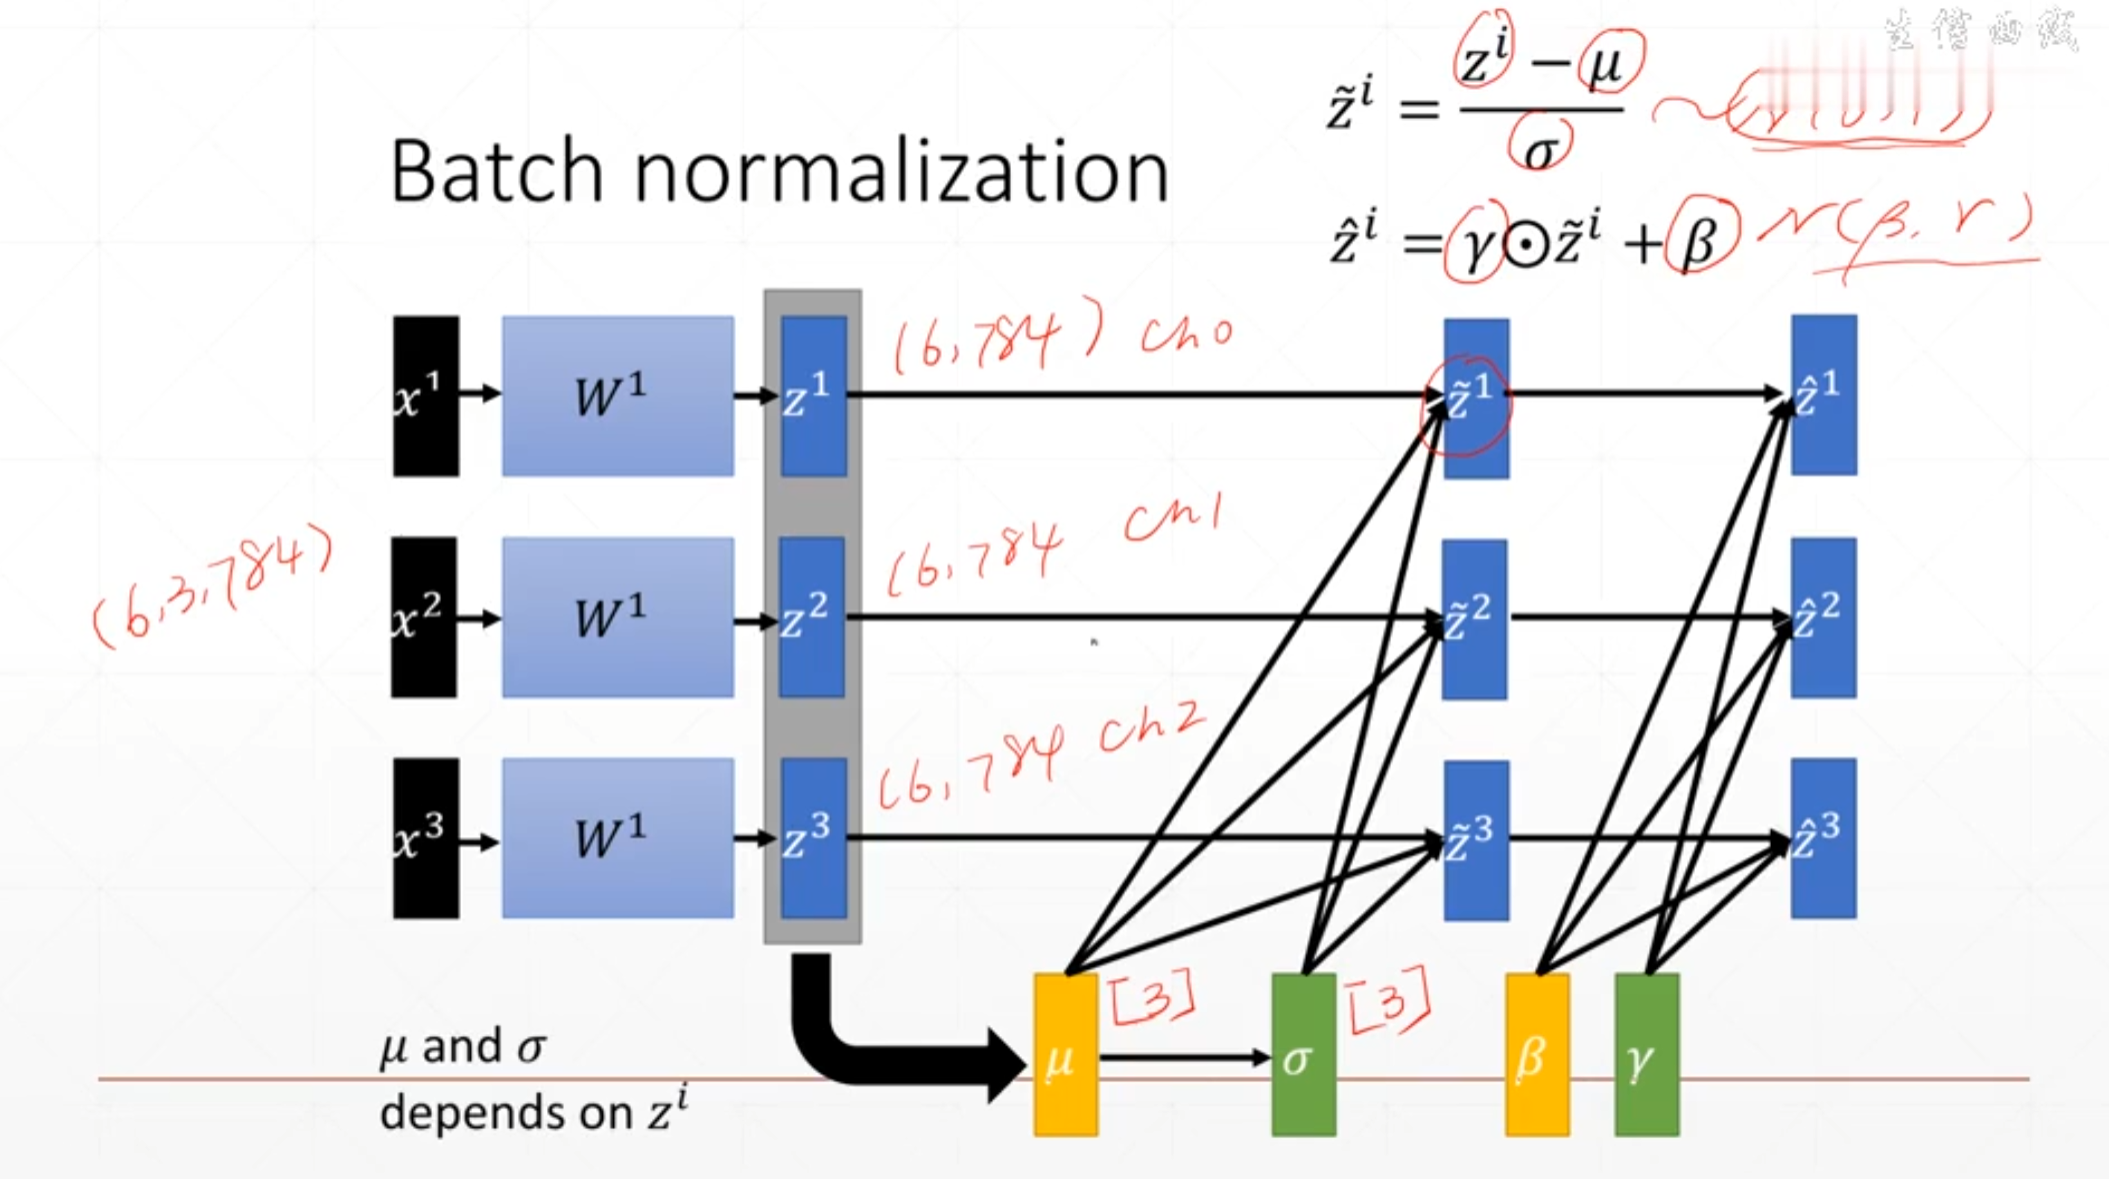

上图中,

μ 和 σ 是统计出来的, 是定值

γ 和 β 需要梯度信息来更新(每次 backpropagation)

# Code Example

In [11]:
x = torch.rand(100, 16, 784)   # 784 = 28 x 28, 100 张图片, 每张图片 channel 数为 16, 每张图片 宽 x 高 = 784
# torch.rand 生成的随机数遵循 0~1 的均匀分布

In [12]:
layer = nn.BatchNorm1d(16)   # 输入参数为图片 channel 数量
out = layer(x)   # 进行一次 forward 运算, 会得到 μ 和 σ^2

In [13]:
layer.running_mean   # 就是 μ
# 因为 torch.rand 生成的随机数遵循 0~1 的均匀分布, 所以 layer.running_mean 里的值都约等于 0.5

tensor([0.0501, 0.0500, 0.0500, 0.0499, 0.0501, 0.0500, 0.0500, 0.0500, 0.0499,
        0.0499, 0.0500, 0.0501, 0.0499, 0.0498, 0.0500, 0.0499])

In [14]:
layer.running_var   # 就是 σ^2

tensor([0.9083, 0.9083, 0.9083, 0.9084, 0.9083, 0.9084, 0.9084, 0.9083, 0.9083,
        0.9083, 0.9084, 0.9083, 0.9084, 0.9083, 0.9083, 0.9084])

# Image3 Batch Normalization Training Pipeline

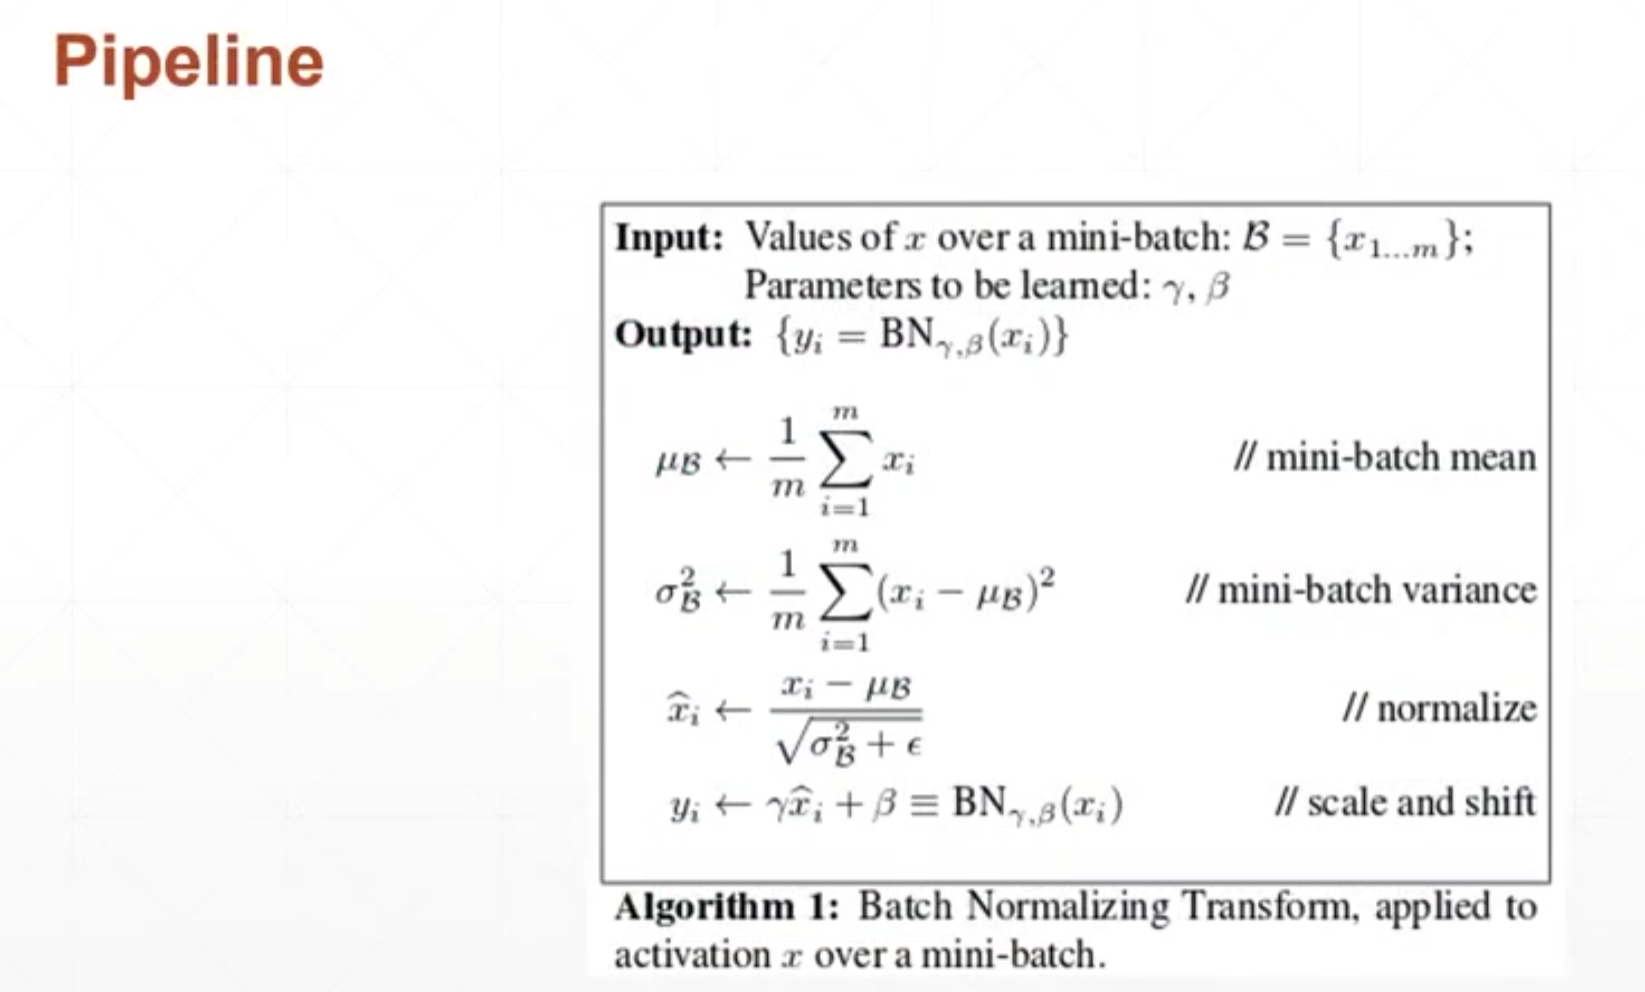

# Code Example

In [16]:
x = torch.rand(1, 16, 7, 7)   # torch.rand(image number, image channel, width, height) 
x.shape

torch.Size([1, 16, 7, 7])

In [17]:
layer = nn.BatchNorm2d(16)   # must match x's channel 

In [18]:
out = layer(x)

In [19]:
layer.weight   
# weight corresponds to γ of Image2
# we can see that layer.weight needs grad to renew

Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True)

In [20]:
layer.weight.shape

torch.Size([16])

In [22]:
layer.bias   
# bias corresponds to β of Image2
# we can see that layer.bias needs grad to renew

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)

In [21]:
layer.bias.shape

torch.Size([16])

In [24]:
vars(layer)   # print all parameters of layer
# running_mean corresponds to μ of Image2
# running_var corresponds to σ^2 of Image2
# weight corresponds to γ of Image2
# bias corresponds to β of Image2

# training indicates whether current mode is training or testing
# affine indicates whether weight(γ) or bias(β) needs automatically renew during backpropagation

{'_backward_hooks': OrderedDict(),
 '_buffers': OrderedDict([('running_mean',
               tensor([0.0501, 0.0551, 0.0500, 0.0485, 0.0510, 0.0544, 0.0502, 0.0538, 0.0453,
                       0.0528, 0.0507, 0.0453, 0.0464, 0.0516, 0.0493, 0.0555])),
              ('running_var',
               tensor([0.9098, 0.9078, 0.9092, 0.9103, 0.9085, 0.9058, 0.9069, 0.9075, 0.9073,
                       0.9085, 0.9079, 0.9092, 0.9083, 0.9087, 0.9106, 0.9094])),
              ('num_batches_tracked', tensor(1))]),
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_modules': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_parameters': OrderedDict([('weight', Parameter containing:
               tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
                      requires_grad=True)), ('bias', Parameter containing:
               tensor([0., 0., 0., 0., 0., 

# Like dropout, the behaviors of training and testing of batch normalization are different

# Here is the testing mode of Batch Normalization

In [25]:
# set layer into testing mode
layer.eval()

BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [26]:
vars(layer)

{'_backward_hooks': OrderedDict(),
 '_buffers': OrderedDict([('running_mean',
               tensor([0.0501, 0.0551, 0.0500, 0.0485, 0.0510, 0.0544, 0.0502, 0.0538, 0.0453,
                       0.0528, 0.0507, 0.0453, 0.0464, 0.0516, 0.0493, 0.0555])),
              ('running_var',
               tensor([0.9098, 0.9078, 0.9092, 0.9103, 0.9085, 0.9058, 0.9069, 0.9075, 0.9073,
                       0.9085, 0.9079, 0.9092, 0.9083, 0.9087, 0.9106, 0.9094])),
              ('num_batches_tracked', tensor(1))]),
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_modules': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_parameters': OrderedDict([('weight', Parameter containing:
               tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
                      requires_grad=True)), ('bias', Parameter containing:
               tensor([0., 0., 0., 0., 0., 

In [28]:
nn.BatchNorm1d(16, eps = 1e-05, momentum = 0.1, affine = True, track_running_stats = True)

BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [29]:
out = layer(x)